# **CRIME PREDICTION USING ML**

# IMPORTING LIBRARIES

In [282]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline
df=pd.read_csv('crime.csv')
df

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,3,3,9.0,16.0,31XX ADANAC ST,Hastings-Sunrise,497265.49,5458296.71,49.277420,-123.037595
530648,Mischief,2017,5,29,22.0,30.0,14XX E 7TH AVE,Grandview-Woodland,494533.97,5456824.97,49.264163,-123.075129
530649,Offence Against a Person,2017,4,13,NaN,NaN,OFFSET TO PROTECT PRIVACY,NaN,0.00,0.00,0.000000,0.000000
530650,Theft from Vehicle,2017,6,5,17.0,0.0,8XX HAMILTON ST,Central Business District,491487.85,5458385.78,49.278168,-123.117031


In [283]:
dataset = pd.DataFrame(df)
dataset = dataset.drop(['YEAR','MONTH','DAY','HOUR','MINUTE','HUNDRED_BLOCK','NEIGHBOURHOOD','X','Y','Latitude'], axis=1	)
dataset

,TYPE,Longitude
0,Other Theft,-123.083763
1,Other Theft,-123.083763
2,Other Theft,-123.083763
3,Other Theft,-123.083763
4,Other Theft,-123.083763
...,...,...
530647,Break and Enter Residential/Other,-123.037595
530648,Mischief,-123.075129
530649,Offence Against a Person,0.000000
530650,Theft from Vehicle,-123.117031


# A DEMO VIEW OF 30 ROWS

In [284]:
df.head(30)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
5,Other Theft,2003,3,26,20.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
6,Break and Enter Residential/Other,2003,3,10,12.0,0.0,63XX WILTSHIRE ST,Kerrisdale,489325.58,5452817.95,49.228051,-123.146610
7,Mischief,2003,6,28,4.0,13.0,40XX W 19TH AVE,Dunbar-Southlands,485903.09,5455883.77,49.255559,-123.193725
8,Other Theft,2003,2,16,9.0,2.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
9,Break and Enter Residential/Other,2003,7,9,18.0,15.0,18XX E 3RD AVE,Grandview-Woodland,495078.19,5457221.38,49.267734,-123.067654


# DEMO DATA

In [285]:
demo_view = df.iloc[1]
demo_view

TYPE                  Other Theft
YEAR                         2003
MONTH                           5
DAY                             7
HOUR                           15
MINUTE                         20
HUNDRED_BLOCK    9XX TERMINAL AVE
NEIGHBOURHOOD          Strathcona
X                          493906
Y                     5.45745e+06
Latitude                  49.2698
Longitude                -123.084
Name: 1, dtype: object

# REDUCING SIZE OF DATASET

**INDEPENDENT VARIABLE**

In [286]:
x=df.head(2000)
x

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Vehicle Collision or Pedestrian Struck (with I...,2003,1,13,17.0,20.0,34XX BLOCK DUNBAR ST,Dunbar-Southlands,486554.00,5455933.00,49.256017,-123.184782
1996,Mischief,2003,10,4,0.0,5.0,46XX CULLODEN ST,Kensington-Cedar Cottage,494251.71,5454524.32,49.243466,-123.078976
1997,Vehicle Collision or Pedestrian Struck (with I...,2003,8,5,18.0,1.0,33XX GRANDVIEW HWY,Renfrew-Collingwood,497609.00,5456127.00,49.257905,-123.032860
1998,Break and Enter Residential/Other,2003,9,9,23.0,0.0,19XX E 6TH AVE,Grandview-Woodland,495285.65,5456925.83,49.265077,-123.064799


# LATITUDE

In [287]:
a = x.iloc[:,10:11].values
a


array([[49.26980201],
       [49.26980201],
       [49.26980201],
       ...,
       [49.25790483],
       [49.26507697],
       [49.2223033 ]])

# LONGITUDE

In [288]:
b = x.iloc[:,11].values
b


array([-123.0837633, -123.0837633, -123.0837633, ..., -123.0328596,
       -123.0647989, -123.1549815])

# TAKING AVERAGE OF LATITUDE AND LONGITUDE

**DATA VISUALIZATION**

**MANY NULL VALUES WERE FOUND** 

In [289]:
X=[]
for i in range(0,2000):
  ab = a[i]+b[i]
  X.append(ab/2)

X

[array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.95927986]),
 array([-36.96908301]),
 array([-36.90698064]),
 array([-36.89996007]),
 array([-36.90698064]),
 array([-36.97032248]),
 array([-36.89981339]),
 array([-36.89978543]),
 array([-36.92942681]),
 array([-36.91905468]),
 array([-36.89963876]),
 array([-36.90698064]),
 array([0.]),
 array([-36.90698064]),
 array([-36.92077292]),
 array([-36.92153414]),
 array([-36.91962003]),
 array([0.]),
 array([-36.97336592]),
 array([-36.97309734]),
 array([-36.97285503]),
 array([-36.97285503]),
 array([-36.92375854]),
 array([-36.92412126]),
 array([-36.92351182]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([-36.92351182]),
 array([-36.92351182]),
 array([-36.9226299]),
 array([-36.88334989]),
 array([-36.92125716]),
 array([-36.92415475]),
 array([-36.92343965]),
 array([-36.92491736]),
 array([0.]),
 

# DATA CLEANING

**THE AVERAGE OF THE OTHER VALUES WERE TAKEN AND THE NULL VALUES WERE SUBSTITUTED**

In [290]:
avg=0
vals=0

for i in X:
  if i<0:
    vals+=1
    avg+=i

avg = avg/vals

avg


array([-36.92462518])

# DATA CLEANSED

In [291]:
for i in range(0,2000):
  if X[i]>=0:
    X[i]=avg


X



[array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.90698064]),
 array([-36.95927986]),
 array([-36.96908301]),
 array([-36.90698064]),
 array([-36.89996007]),
 array([-36.90698064]),
 array([-36.97032248]),
 array([-36.89981339]),
 array([-36.89978543]),
 array([-36.92942681]),
 array([-36.91905468]),
 array([-36.89963876]),
 array([-36.90698064]),
 array([-36.92462518]),
 array([-36.90698064]),
 array([-36.92077292]),
 array([-36.92153414]),
 array([-36.91962003]),
 array([-36.92462518]),
 array([-36.97336592]),
 array([-36.97309734]),
 array([-36.97285503]),
 array([-36.97285503]),
 array([-36.92375854]),
 array([-36.92412126]),
 array([-36.92351182]),
 array([-36.92462518]),
 array([-36.92462518]),
 array([-36.92462518]),
 array([-36.92462518]),
 array([-36.92462518]),
 array([-36.92351182]),
 array([-36.92351182]),
 array([-36.9226299]),
 array([-36.88334989]),
 array([-36.92125716]),
 array([-36.92415

# DEPENDENT VARIABLE

**REDUCING SIZE TO 2K**

In [292]:
y=df.head(2000)
y

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.50,5457452.47,49.269802,-123.083763
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Vehicle Collision or Pedestrian Struck (with I...,2003,1,13,17.0,20.0,34XX BLOCK DUNBAR ST,Dunbar-Southlands,486554.00,5455933.00,49.256017,-123.184782
1996,Mischief,2003,10,4,0.0,5.0,46XX CULLODEN ST,Kensington-Cedar Cottage,494251.71,5454524.32,49.243466,-123.078976
1997,Vehicle Collision or Pedestrian Struck (with I...,2003,8,5,18.0,1.0,33XX GRANDVIEW HWY,Renfrew-Collingwood,497609.00,5456127.00,49.257905,-123.032860
1998,Break and Enter Residential/Other,2003,9,9,23.0,0.0,19XX E 6TH AVE,Grandview-Woodland,495285.65,5456925.83,49.265077,-123.064799


**INDEPENDENT VARIABLE TAKEN**

In [293]:
y = y.iloc[:,0:1].values
y

array([['Other Theft'],
       ['Other Theft'],
       ['Other Theft'],
       ...,
       ['Vehicle Collision or Pedestrian Struck (with Injury)'],
       ['Break and Enter Residential/Other'],
       ['Break and Enter Residential/Other']], dtype=object)

# FINDING DIFFERENT TYPES OF CRIME

In [294]:
YY = [] 
ynum=0
for i in y: 
    if i not in YY: 
        ynum+=1
        YY.append(i)

YY


[array(['Other Theft'], dtype=object),
 array(['Break and Enter Residential/Other'], dtype=object),
 array(['Mischief'], dtype=object),
 array(['Break and Enter Commercial'], dtype=object),
 array(['Offence Against a Person'], dtype=object),
 array(['Theft from Vehicle'], dtype=object),
 array(['Vehicle Collision or Pedestrian Struck (with Injury)'],
       dtype=object)]

**THERE ARE 7 DIFFERENT TYPES OF CRIMES IN THE DATASET**

In [295]:
ynum

7

# REPLACING EACH CRIME WITH A NUMBER FOR EASY COMPUTATION

In [297]:
Y=y

for i in range(0,2000):
  if Y[i]=='Other Theft':
    Y[i]=1
  elif Y[i]=='Break and Enter Residential/Other':
    Y[i]=2
  elif Y[i]=='Mischief':
    Y[i]=3
  elif Y[i]=='Break and Enter Commercial':
    Y[i]=4
  elif Y[i]=='Offence Against a Person':
    Y[i]=5
  elif Y[i]=='Theft from Vehicle':
    Y[i]=6
  else:
    Y[i]=7

Y
  



array([[1],
       [1],
       [1],
       ...,
       [7],
       [2],
       [2]], dtype=object)

# FINDING THE NUMBER OF EACH TYPE OF CRIME

In [298]:
theft=0
breakin=0
mischief=0
commercial=0
offence=0
vehicle=0
collision=0

for i in Y:
  if i == 1:
    theft+=1
  elif i == 2:
    breakin+=1
  elif i == 3:
    mischief+=1
  elif i == 4:
    commercial+=1
  elif i == 5:
    offence+=1
  elif i == 6:
    vehicle+=1
  elif i == 7:
    collision+=1


print("Number of thefts= ", theft)
print("Number of = reak and Enter Residential/Other = ", breakin)
print("Number of mischief = ", mischief)
print("Number of Break and Enter Commercial= ", commercial)
print("Number of Offence Against a Person = ", offence)
print("Number of Theft from Vehicle = ", vehicle)
print("Number of Vehicle Collision or Pedestrian Struck (with Injury) = ", collision)



Number of thefts=  88
Number of = reak and Enter Residential/Other =  320
Number of mischief =  186
Number of Break and Enter Commercial=  176
Number of Offence Against a Person =  167
Number of Theft from Vehicle =  272
Number of Vehicle Collision or Pedestrian Struck (with Injury) =  791


In [299]:
Y=Y.astype('int')

In [300]:
dataset = dataset.head(2000)
dataset['CRIME'] = Y
dataset['PLACE'] = X
dataset.drop(['TYPE','Longitude'], axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CRIME,PLACE
0,1,[-36.90698064499999]
1,1,[-36.90698064499999]
2,1,[-36.90698064499999]
3,1,[-36.90698064499999]
4,1,[-36.90698064499999]
...,...,...
1995,7,[-36.96438257]
1996,3,[-36.91775493]
1997,7,[-36.887477385]
1998,2,[-36.899860965]


# VIEWING THE CRIME PLOT GRAPH

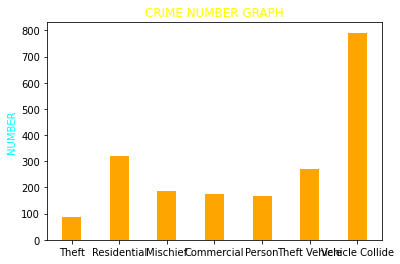

In [301]:
labels = ['Theft', 'Residential','Mischief','Commercial','Person','Theft Vehicle', 'Vehicle Collide']
number = [theft,breakin,mischief,commercial,offence,vehicle,collision]

fig, ax = plt.subplots()

width = 0.4

ax.bar(labels, number,width, color='Orange')

ax.set_ylabel('NUMBER', color= 'aqua')
ax.set_title('CRIME NUMBER GRAPH', color='yellow')

plt.show()


# USING KNN

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

In [304]:
knn = KNeighborsClassifier(n_neighbors=5)

In [305]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [306]:
pred = knn.predict(X_test)

In [307]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [308]:
print(confusion_matrix(y_test,pred))

[[ 21   0   0   0   0   1   4]
 [  1  41   2   3   0   4  36]
 [  0  11  15   6   0  10  24]
 [  2   8   4  28   0   3  13]
 [  0   0   0   0  55   0   0]
 [  0   6   0   3   1  59   9]
 [  5  31  16  11   0  12 155]]


In [309]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.72      0.81      0.76        26
           2       0.42      0.47      0.45        87
           3       0.41      0.23      0.29        66
           4       0.55      0.48      0.51        58
           5       0.98      1.00      0.99        55
           6       0.66      0.76      0.71        78
           7       0.64      0.67      0.66       230

    accuracy                           0.62       600
   macro avg       0.63      0.63      0.62       600
weighted avg       0.61      0.62      0.61       600



In [310]:

accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    accuracy_rate.append(score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [311]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    error_rate.append(1-score.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

Text(0, 0.5, 'Error Rate')

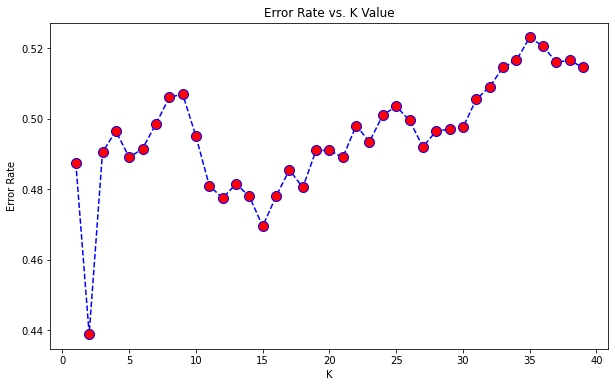

In [312]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [313]:
# NOW WITH K=15
knn = KNeighborsClassifier(n_neighbors=15)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[ 12   0   0   0   0   1  13]
 [  0  28   0   7   0   6  46]
 [  1   5  14   5   0   7  34]
 [  1   7   1  27   0   1  21]
 [  0   0   0   0  55   0   0]
 [  5   5   0   6   2  47  13]
 [  7  24  13   9   0  11 166]]


              precision    recall  f1-score   support

           1       0.46      0.46      0.46        26
           2       0.41      0.32      0.36        87
           3       0.50      0.21      0.30        66
           4       0.50      0.47      0.48        58
           5       0.96      1.00      0.98        55
           6       0.64      0.60      0.62        78
           7       0.57      0.72      0.63       230

    accuracy                           0.58       600
   macro avg       0.58      0.54      0.55       600
weighted avg       0.57      0.58      0.57       600



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# CRIME PREDICTING

**THE DATASET IS CONCENTRATED IN ONE PLACE ONLY DUE TO WHICH THE LATITUDE_LONGITUDE RANGE CAN VARY ONLY FROM -30 to -40**

In [314]:
print("Give the desired Longitude")
longi = float(input())
print("Give the desired Latitude")
latit = float(input())
longlang = (longi+latit)/2
inp = np.array([longlang]) 
inp = inp.reshape(1, -1)

prediction = knn.predict(inp)

if (prediction == 1):
  print("Crime is Theft")
elif (prediction == 3):
  print("Crime is mischief")
elif (prediction == 2):
  print("Crime is Break and Enter Residential")
elif (prediction == 4):
  print("Crime is Break and Enter commercial")
elif (prediction == 5):
  print("Crime is Offence against a person")
elif (prediction == 1):
  print("Crime is Theft from vehicle")
else:
  print("Crime is Vehicle Collision or pedestrian struck/injured")

Give the desired Longitude
-34.5
Give the desired Latitude
-33.2
Crime is Vehicle Collision or pedestrian struck/injured


# **THE OUTPUT USUALLY WOULD GIVE ONLY Vehicle Collision or pedestrian struck/injured BECAUSE OF THE DENSITY OF THE DATASET IN A PARTICULAR PLACE. A BETTER DATASET WOULD GIVE BETTER RESULTS**